In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

iris = pd.read_csv(url)

iris.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.size

750

In [ ]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
# how many points in each class & how many flowers for each species
# we gotta check if the data is balanced or imbalanced
# this data is balanced

iris['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

## 2-D scatter plot


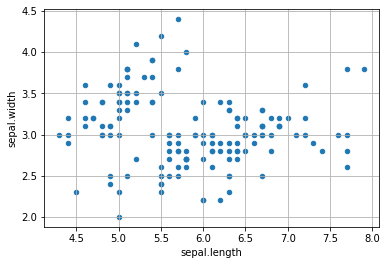

In [ ]:
# understand the axies: labels and scales.

iris.plot(kind = 'scatter', x = 'sepal.length', y = 'sepal.width') 
plt.grid()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


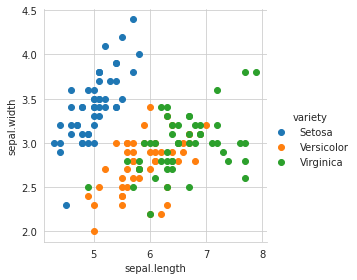

In [ ]:
# what if we can add color!
# so we use seaborn as 'sns

sns.set_style("whitegrid");
sns.FacetGrid(iris, hue = "variety", size= 4) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend();
plt.show()

# now the blue points can be easily spreated from the red and green ones




## Pair-plot


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


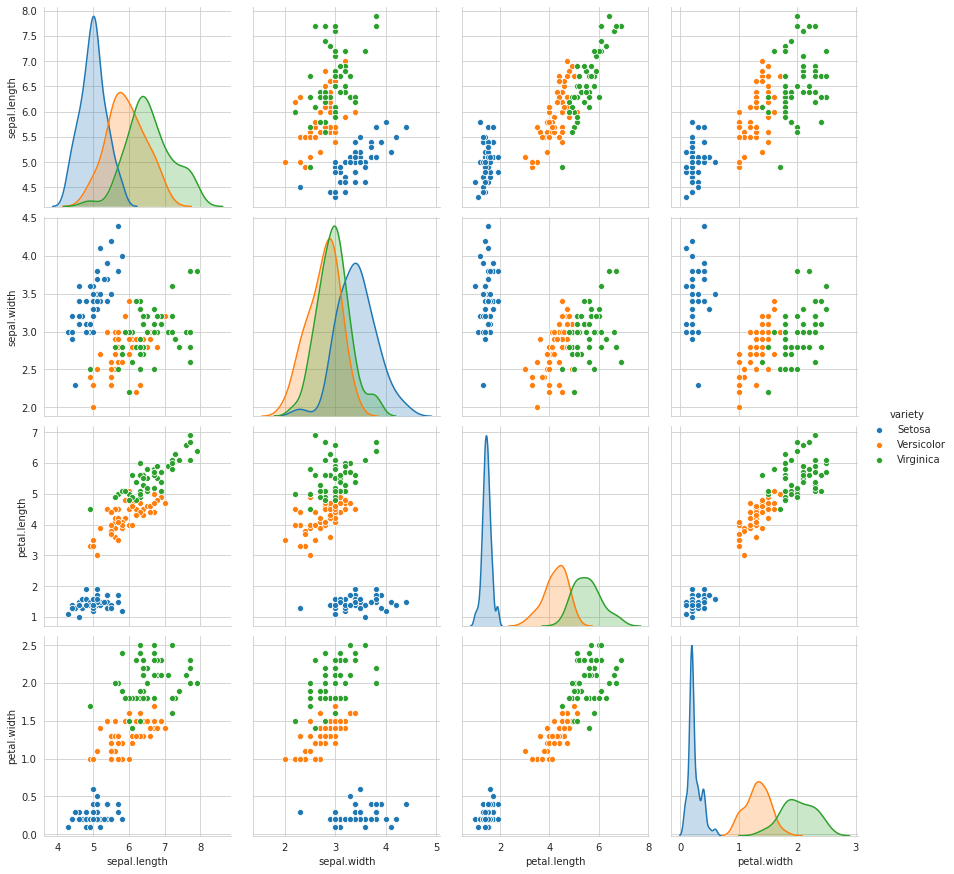

In [ ]:
# it can be use when the number of features are high
# cannot visualize higher dimensional patterns more than 7-d (if u have 7 features or more, less than 7 features is ok)
# only possible to few 2-d patterns

plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue= "variety", size= 3)
plt.show()


# we can see petal.length & petal.width are the best features to use to spreate all the three types

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


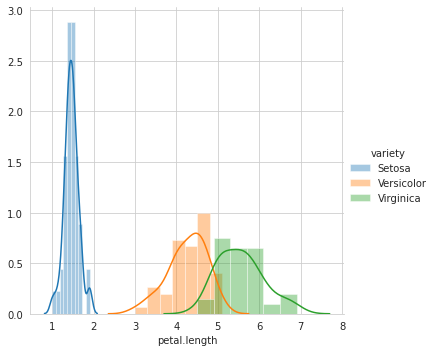

In [ ]:
# PDF plot
# What if we have 1-d dataset( have only one feature)



sns.FacetGrid(iris, hue= "variety", size= 5) \
   .map(sns.distplot, "petal.length") \
   .add_legend()
plt.show()

# while the Y-axies represent the density of the the existing elements 

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


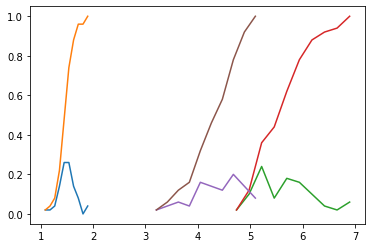

In [ ]:
# CDF plot 
#  we can visually see what percentage of each label in each given number using petal.length (or any other feature)
# if we use only one features let say petal.length we might have some error


# spreating the labeels and store them in diffrent variables
iris_setosa = iris.loc[iris['variety'] == 'Setosa']
iris_Virginica = iris.loc[iris['variety'] == 'Virginica']
iris_Versicolor = iris.loc[iris['variety'] == 'Versicolor']




# *Ploting setosa*

# CDF of petal.length

counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins= 10, density= True)

# make a pdf
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# make a cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


#  we can keep changing  the feature till we found one which can help us tp sprate accuratly

# *ploting Virginica*
counts, bin_edges = np.histogram(iris_Virginica ['petal.length'], bins= 10, density= True) 

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



# *Ploting Versicolor*
counts, bin_edges = np.histogram(iris_Versicolor['petal.length'], bins= 10, density= True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


# show everthin in one plot
plt.show()

In [ ]:
# using mean and viriance and std-div to get information about the data
# it works like plot but in a math way with ploting 
# it has a one downfall which is if there's an outlier it will currupt the the data

print("Mean:")
print(np.mean(iris_setosa["petal.length"]))
# currupted outlier
print(np.mean(np.append(iris_setosa["petal.length"], 50)))

print(np.mean(iris_Virginica["petal.length"]))
print(np.mean(iris_Versicolor["petal.length"]))

print("\nstd-div:")
print(np.std(iris_setosa["petal.length"]))
print(np.std(iris_Virginica["petal.length"]))
print(np.std(iris_Versicolor["petal.length"]))

Mean:
1.4620000000000002
2.4137254901960787
5.552
4.26

std-div:
0.17191858538273286
0.5463478745268441
0.4651881339845204


In [ ]:
# meadian its equivalent to mean but its won't be affected with an outlier 
# unless the corrupted outliers is more than 50%
print("\nMedian:")
print(np.median(iris_setosa["petal.length"]))
# currupted outlier
print(np.median(np.append(iris_setosa["petal.length"], 50)))
print(np.median(iris_Virginica["petal.length"]))
print(np.median(iris_Versicolor["petal.length"]))

# Quantiles gives u the 25% percentage,50%(which is the median), 75%, and 100%
print("\nQuantiles:")
print(np.percentile(iris_setosa["petal.length"], np.arange(0, 100, 25)))
print(np.percentile(iris_Virginica["petal.length"], np.arange(0, 100, 25)))
print(np.percentile(iris_Versicolor["petal.length"], np.arange(0, 100, 25)))

# Percentile gives you the percent of any value u choose (for example 90th percentile means 90th percent of ur customer like this(refer to AI applied coures for more detials))
print("\nPercentiles:")
print(np.percentile(iris_setosa["petal.length"], 90))
print(np.percentile(iris_Virginica["petal.length"], 90))
print(np.percentile(iris_Versicolor["petal.length"], 90))

# Median Absolute Value(MAD) which like std-div used with Median but it's also dosen't have the problem of outlier
from statsmodels import robust
print("\nMAD:")
print(robust.mad(iris_setosa["petal.length"]))
print(robust.mad(iris_Virginica["petal.length"]))
print(robust.mad(iris_Versicolor["petal.length"]))


Median:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

Percentiles:
1.7
6.3100000000000005
4.8

MAD:
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Box-plot with whiskers

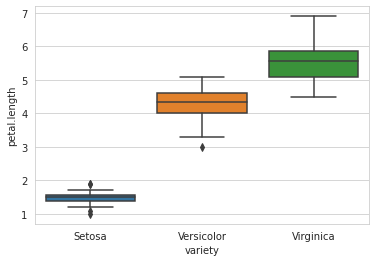

In [ ]:
# it is used to show the percentile and quantiles more clearly ( the 25%, 50%, 75%)
# it is also usefull when i use threshold (a value to start with)

sns.boxplot(x='variety', y='petal.length', data=iris)
plt.show()

## Violin Plots

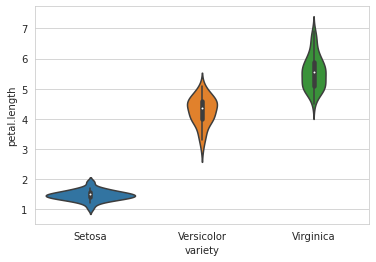

In [ ]:
# it's like combining PDF and Box-plot with whiskers 
# we can see the precentile of a feature also its density
sns.violinplot(x = 'variety', y = 'petal.length', data = iris, size = 10)

## Multivariable probability density

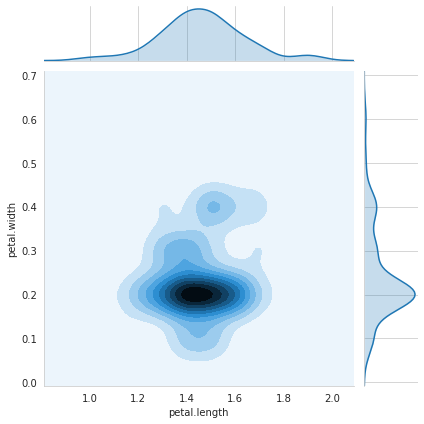

In [ ]:
# it is used to plot 2-d (most of the time ) which has 2 features (3-d is not used too much)

sns.jointplot(x = "petal.length", y = "petal.width", data = iris_setosa, kind = "kde")